In [ ]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load karate graph
G = nx.karate_club_graph()
# Find communities using Girvan-Newman
communities = list(nx.community.girvan_newman(G))

In [ ]:
"""
Các metrics chính trong phân tích cộng đồng mạng:

Modularity
Ý nghĩa: Đo độ mạnh của cấu trúc cộng đồng
Phạm vi: [-1, 1]
Giá trị tốt: > 0.3
Càng cao càng tốt

Conductance
Ý nghĩa: Tỷ lệ kết nối ra bên ngoài cộng đồng
Phạm vi: [0, 1]
Giá trị tốt: < 0.3
Càng thấp càng tốt


Internal Density
Ý nghĩa: Mật độ kết nối trong cộng đồng
Phạm vi: [0, 1]
Giá trị tốt: > 0.7
Càng cao càng tốt


Ratio Cut
Ý nghĩa: Đo tỷ lệ giữa cạnh cắt và kích thước tập node
Phạm vi: [0, ∞)
Giá trị tốt: càng thấp càng tốt
Cân bằng giữa kích thước và số cạnh cắt


Normalized Cut
Ý nghĩa: Phiên bản chuẩn hóa của ratio cut theo volume
Phạm vi: [0, 2]
Giá trị tốt: càng thấp càng tốt
Cân bằng volume giữa các cộng đồng


Volume
Ý nghĩa: Tổng bậc của các node trong cộng đồng
Phạm vi: [0, 2|E|]
Dùng để đánh giá kích thước cộng đồng


Edges Cut
Ý nghĩa: Số cạnh kết nối ra ngoài cộng đồng
Phạm vi: [0, |E|]
Càng thấp càng tốt
Đo mức độ tách biệt của cộng đồng
"""

In [ ]:
# Modularity -> measures the strength of division of a network into modules
# Tạo một danh sách rỗng để lưu trữ các giá trị k và modularity
modularity_data = []

for k in range(len(communities)-2):
  community_modularity = nx.community.modularity(G, communities[k])
  modularity_data.append((k+1, community_modularity))

# Tạo DataFrame từ danh sách k và modularity
modularity_df = pd.DataFrame(modularity_data, columns=['k', 'Modularity'])
print(modularity_df)

     k  Modularity
0    1    0.347660
1    2    0.342319
2    3    0.358061
3    4    0.384972
4    5    0.375780
5    6    0.359476
6    7    0.347070
7    8    0.333249
8    9    0.313441
9   10    0.312260
10  11    0.303686
11  12    0.294297
12  13    0.282716
13  14    0.271162
14  15    0.254465
15  16    0.239754
16  17    0.226898
17  18    0.222991
18  19    0.200568
19  20    0.186962
20  21    0.160913
21  22    0.142810
22  23    0.117689
23  24    0.110886
24  25    0.100766
25  26    0.088379
26  27    0.056240
27  28    0.043983
28  29    0.011516
29  30   -0.003504
30  31   -0.031053


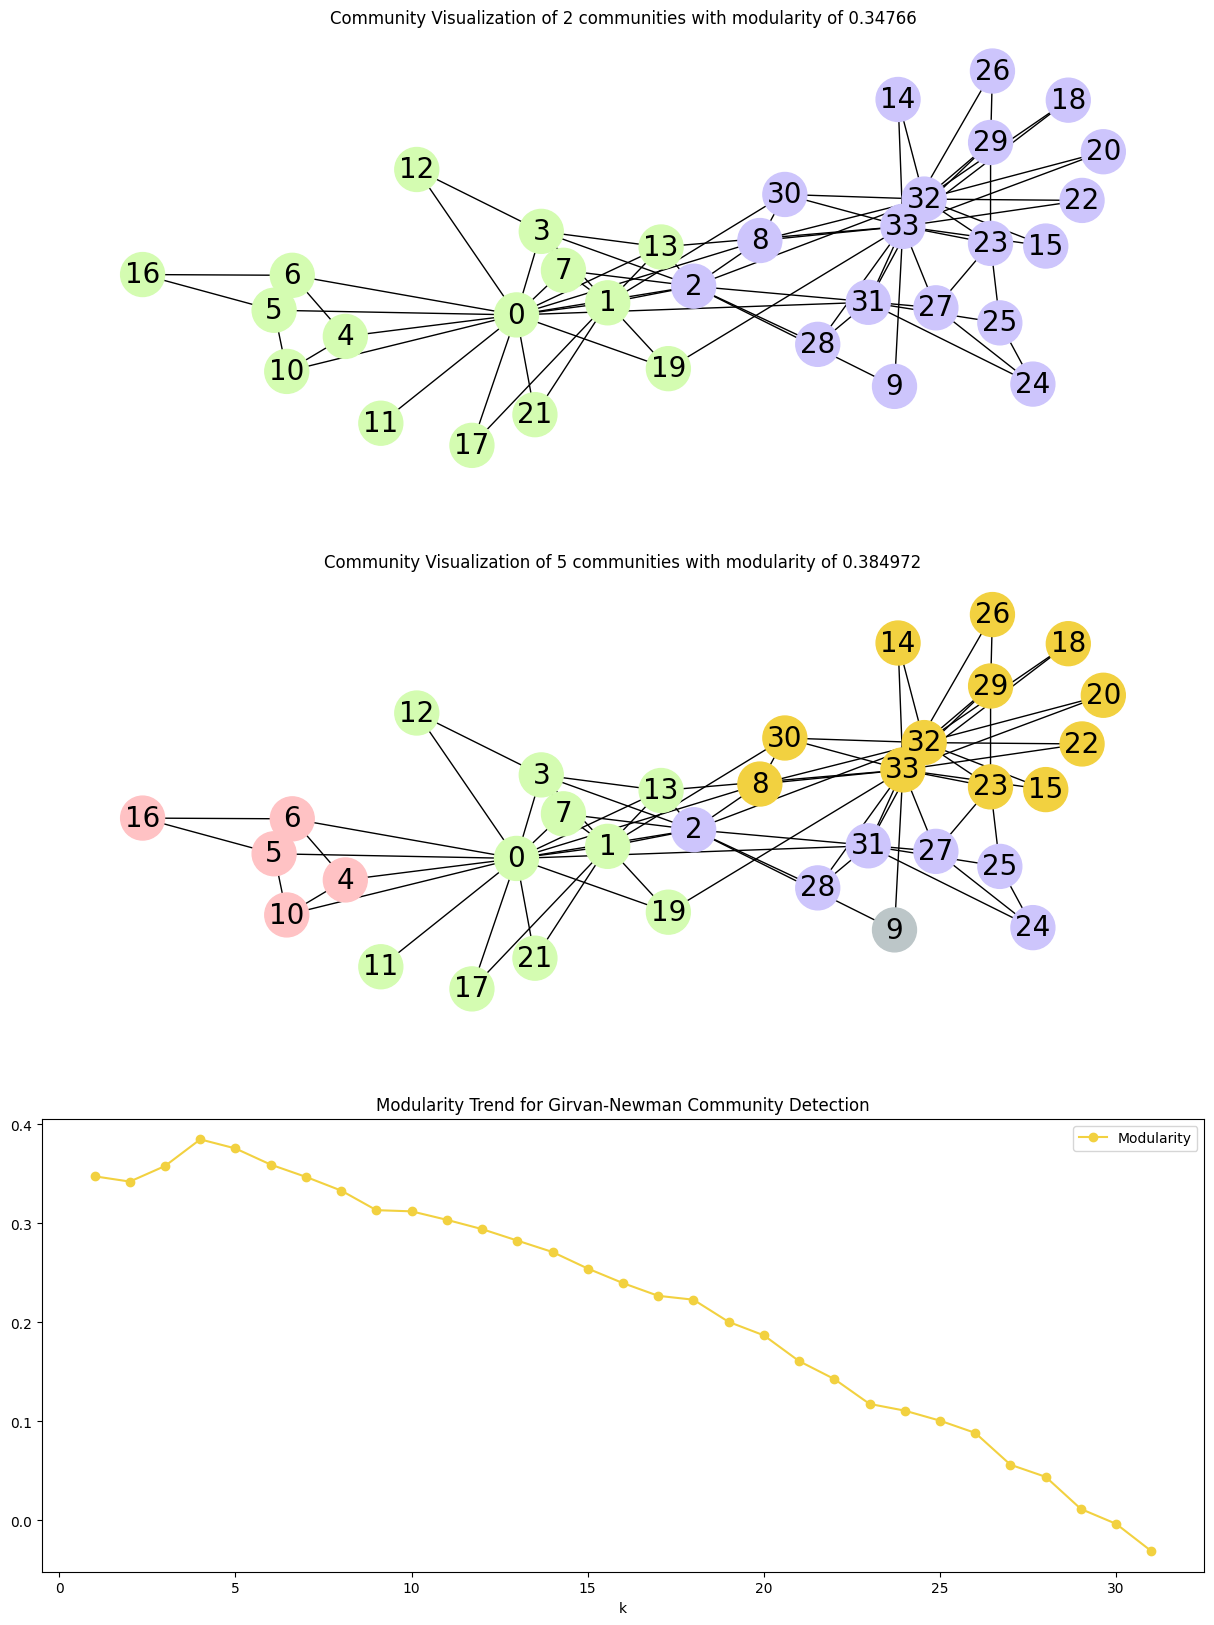

In [ ]:
# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities)
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )

fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[3], 2)

modularity_df.plot.line(
    x="k",
    y="Modularity",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
    marker='o',  # Thêm dấu chấm tại mỗi điểm trên đường
)

plt.show()